In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
def circle(m, n, r=1):
    fi_np = [(i - 1)/(m) * (2 * np.pi) + (2 * np.pi/n) * 1/2 for i in range(1, m+1)]
    r_np = [r for i in range(1, m+1)]
    fi_np = np.array(fi_np + [fi_np[0]])
    r_np = np.array(r_np + [r_np[0]])
    return pol2cart(r_np, fi_np)

def sector(m, fi0, fi1, in_r=0, out_r=1):
    fi_np = np.linspace(fi0, fi1, m, endpoint=True)
    out_x, out_y = pol2cart([out_r for i in range(1, fi_np.shape[0]+1)], fi_np)
    in_x, in_y = pol2cart([in_r for i in range(1, fi_np.shape[0]+1)], fi_np[::-1])

    x = np.concatenate([out_x, in_x, out_x[:1]])
    y = np.concatenate([out_y, in_y, out_y[:1]])

    return x, y

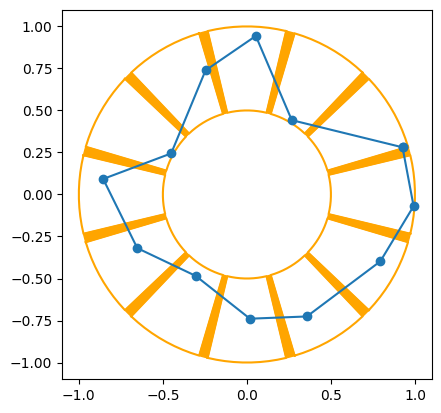

In [9]:
fi_d = 0.45
R_range = [0.5, 1]
n = 12
m = n*10

sector_color = 'orange'
circle_color = 'black'

plt.gca().set_aspect('equal')

sector_middle_fi = [(i - 1)/(n) * (2 * np.pi) for i in range(1, n+1)]
for idx, fi in enumerate(sector_middle_fi):
    fi0 = fi - (2 * np.pi/n) * fi_d
    fi1 = fi + (2 * np.pi/n) * fi_d
    plt.plot(*sector(round(m/n), fi0, fi1, in_r=R_range[0], out_r=R_range[1]), color=sector_color)

    idx_next = idx+1
    if idx_next < len(sector_middle_fi):
        fi_next = sector_middle_fi[idx_next]- (2 * np.pi/n) * fi_d
    else:
        fi_next = sector_middle_fi[0] + (2 * np.pi) - (2 * np.pi/n) * fi_d
    plt.fill(*sector(round(m/n), fi1, fi_next , in_r=R_range[0], out_r=R_range[1]), color=sector_color)

# in_x, in_y = circle(n, n, r=R_range[0])
# out_x, out_y = circle(n, n, r=R_range[1])
# plt.plot(*circle(m, n, r=R_range[0]), color=circle_color)
# plt.plot(*circle(m, n, r=R_range[1]), color=circle_color)
# for x0, y0, x1, y1 in zip(in_x, in_y, out_x, out_y):
#     plt.plot([x0, x1], [y0, y1], color=circle_color)

fi_np = [(i - 1)/(n) * (2 * np.pi) + (2 * np.pi/n) * np.random.uniform(1 - fi_d, 1 + fi_d) for i in range(1, n+1)]
r_np = [np.random.uniform(*R_range) for i in range(1, n+1)]
fi_np = np.array(fi_np + [fi_np[0]])
r_np = np.array(r_np + [r_np[0]])
x, y = pol2cart(r_np, fi_np)

res = plt.plot(x, y, marker='o')